# Pair Porgramming Asunciones Regresión Lineal

In [29]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
import random 

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Estadísticos
# ------------------------------------------------------------------------------
from scipy import stats
import researchpy as rp
from scipy.stats import levene
from scipy.stats import kstest
import statsmodels.api as sm


plt.rcParams["figure.figsize"] = (10,8) 

In [30]:
df = pd.read_csv('data/sin_outliers_data.csv', index_col=0)

Las asunciones cuando queramos trabajar con un ANOVA:

Sin embargo, no nos podemos poner a hacer nuestras operaciones a lo loco. Antes de hacer nada, tenemos que comprobar una serie de asunciones. ¿Cuáles son?

- Los datos deben ser normales -> test de normalidad
- Las variables deben ser independientes -> correlación
- Homogeneidad de las varianzas o heterocedasticidad -> test de heterocedasticidad


Test de normalidad(ya lo vimos en el ejercicio 2):

In [31]:
kstest(df["charges"], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

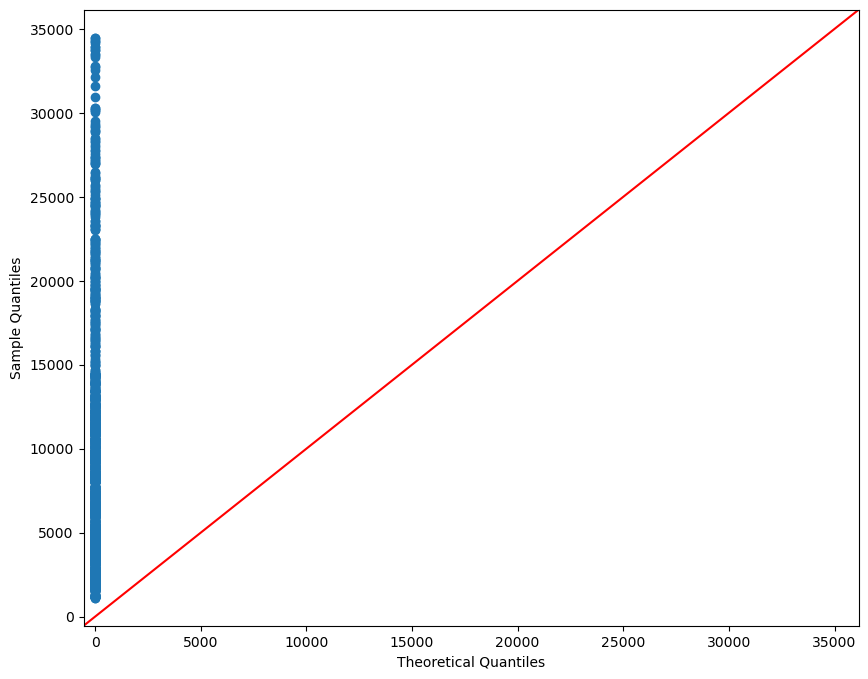

In [32]:
sm.qqplot(df['charges'], line ='45');

Los datos no se aproximan nada a la línea roja, lo que nos indica que los datos no son normales. 

## 2. Las variables deben ser independientes  

In [33]:
numericas = df.select_dtypes(include = np.number)

<AxesSubplot:>

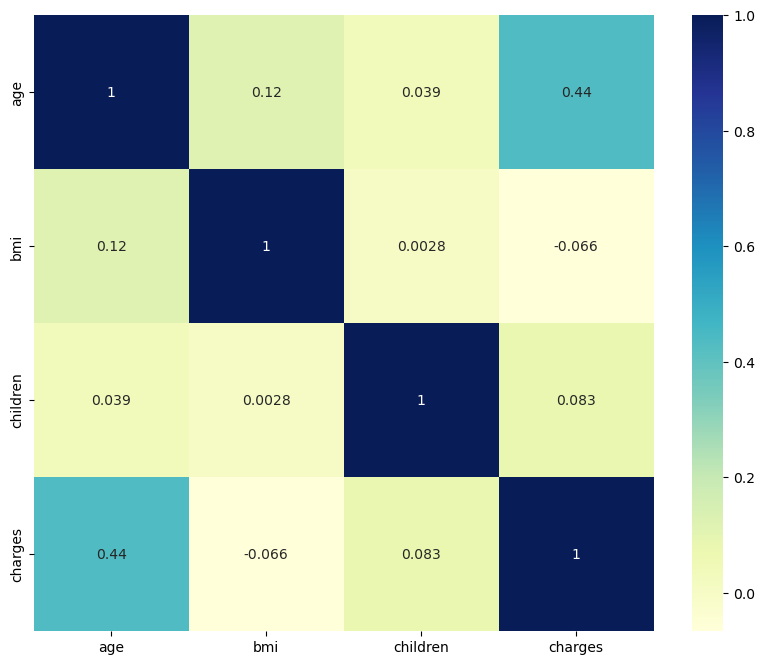

In [34]:
sns.heatmap(df.corr(), cmap = 'YlGnBu', annot = True)

In [35]:
categoricas = df.select_dtypes(include = 'O') #Primero seleccionamos nuestras columnas categóricas

In [36]:
crosstab, test_results2, expected2 = rp.crosstab(df["sex"], df["region"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

In [37]:
test_results2

,Chi-square test,results
0,Pearson Chi-square ( 3.0) =,0.0356
1,p-value =,0.9982
2,Cramer's V =,0.0054


Variables independientes, porque el p-value es mayor que 0.5. No se puede rechazar la H0.

Cramer's V nos dice la fuerza de la relación en caso de que la haya. Como el valor esta entre 0 - 0.1 nos dice que son dependientes, pero es un errorcito.

### 3. Homogeneidad de las varianzas o heterocedasticidad -> test de heterocedasticidad

Para comprobar la homgeneidad de las varianzas de las variables predictoras **categóricas**, hacemos violinplot. Vemos si las medianas de nuestras categorías son iguales o diferentes.

In [38]:
categoricas.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


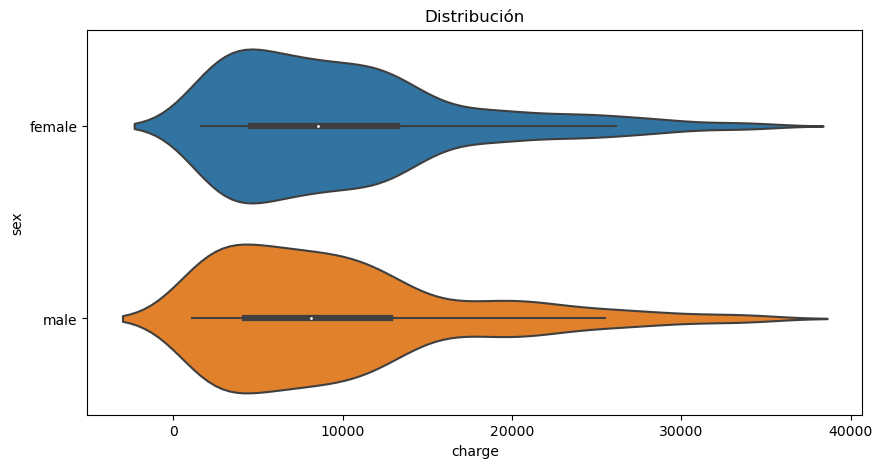

In [39]:


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.violinplot(
    x       = 'charges',
    y       = 'sex',
    data    = df,
    palette = 'tab10',
    ax      = ax
)
ax.set_title('Distribución')
ax.set_ylabel('sex')
ax.set_xlabel('charge');

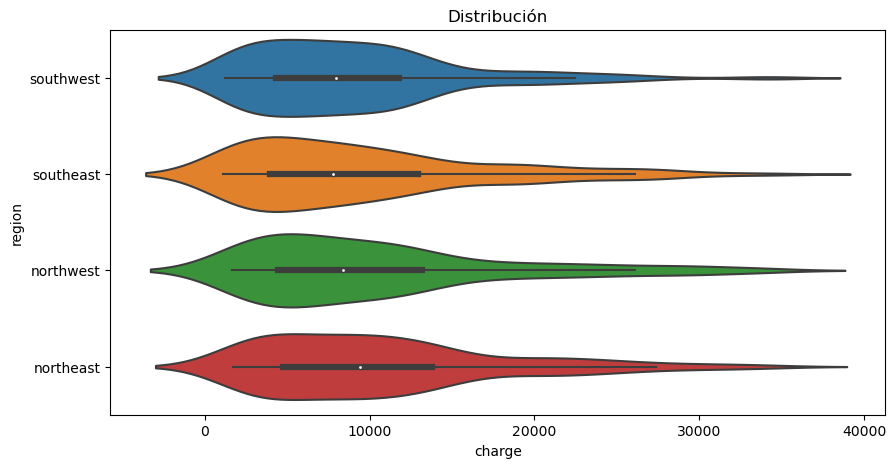

In [40]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.violinplot(
    x       = 'charges',
    y       = 'region',
    data    = df,
    palette = 'tab10',
    ax      = ax
)
ax.set_title('Distribución')
ax.set_ylabel('region')
ax.set_xlabel('charge');

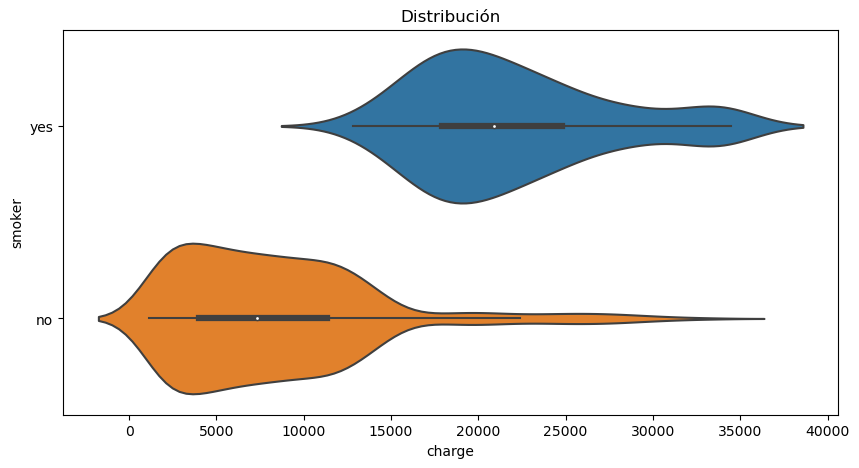

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.violinplot(
    x       = 'charges',
    y       = 'smoker',
    data    = df,
    palette = 'tab10',
    ax      = ax
)
ax.set_title('Distribución')
ax.set_ylabel('smoker')
ax.set_xlabel('charge');

La mediana de nuestros grupos es muy parecida, al igual que la varianza. Esto significa que es homogenea. No obstante comprobamos mediante el test de Levenne, que es el más robusto ante datos no normales.

- Para categoria *sexo*:

In [42]:

df['sex'].unique() #Vemos primero los  valores únicos que tiene la columna

array(['female', 'male'], dtype=object)

In [43]:
masculino= df[df['sex']=='male']['charges'] #Creamos dos df, uno por cada valor único
femenino= df[df['sex']=='female']['charges']

In [44]:
levene_test = stats.levene(masculino, femenino, center='median') #Aplicamos el test
levene_test

LeveneResult(statistic=0.45542150424248273, pvalue=0.49990198120663454)

Para la variable categórica *'sexo'*, obtenemos un p-value > 0.05, por lo tanto podemos aceptar la hipotesis 0 (nuestras varianzas son homogeneas)  con lo que sí se cumple la asunción de homocedasticidad.

- Para categoria *smoker*:

In [45]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [46]:
fumador= df[df['smoker']=='yes']['charges']
no_fumador= df[df['smoker']=='no']['charges']

In [47]:
levene_test = stats.levene(fumador, no_fumador, center='median')
levene_test

LeveneResult(statistic=0.007275778993182423, pvalue=0.9320386169861525)

Para la variable categórica *'smoker'*, obtenemos un p-value > 0.05, por lo tanto podemos aceptar la hipotesis 0 (nuestras varianzas son homogeneas)  con lo que sí se cumple la asunción de homocedasticidad.

- Para categoria *region*:

In [48]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [49]:
sur_oeste= df[df['region']=='southwest']['charges']
sur_este= df[df['region']=='southeast']['charges']
nor_oeste= df[df['region']=='northwest']['charges']
nor_este= df[df['region']=='northeast']['charges']

In [50]:
levene_test = stats.levene(sur_este, sur_oeste, nor_este, nor_oeste, center='median')
levene_test

LeveneResult(statistic=2.73322677477775, pvalue=0.04252872319674293)

Para la variable categórica *'region'*, obtenemos un p-value < 0.05, por lo tanto no podemos aceptar la hipotesis 0 (nuestras varianzas son homogeneas)  con lo que no se cumple la asunción de homocedasticidad.

Vamos ahora con la homogeneidad de las varianzas de las **variables predictoras numéricas**, para lo que hacemos regplot.

In [51]:
numericas=df.select_dtypes(include = np.number)

- Para la variable *age*:

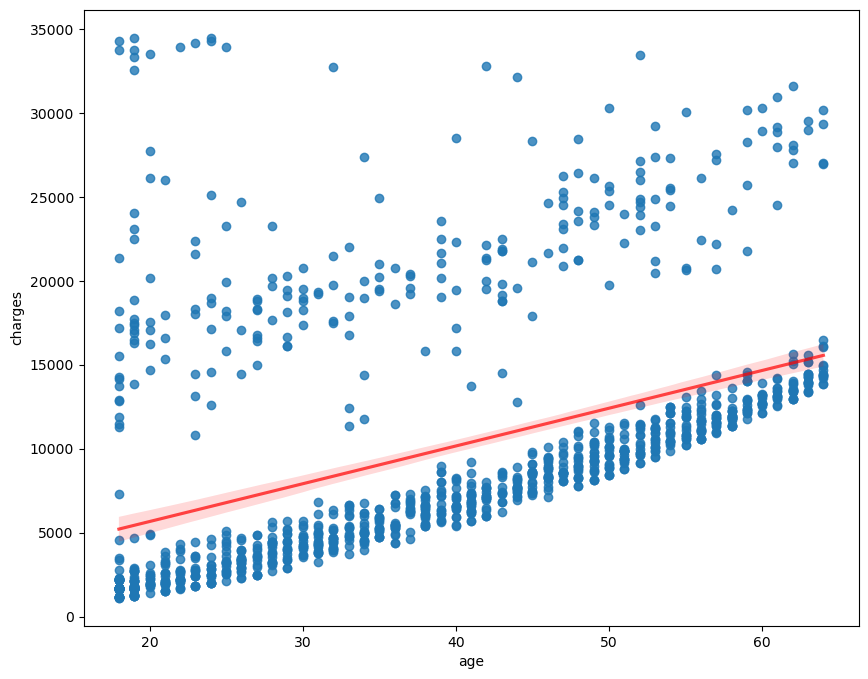

In [52]:
sns.regplot(data = df,x = 'age', y = 'charges',line_kws = {"color": "red", "alpha": 0.7 });

- Para la variable *bmi*:

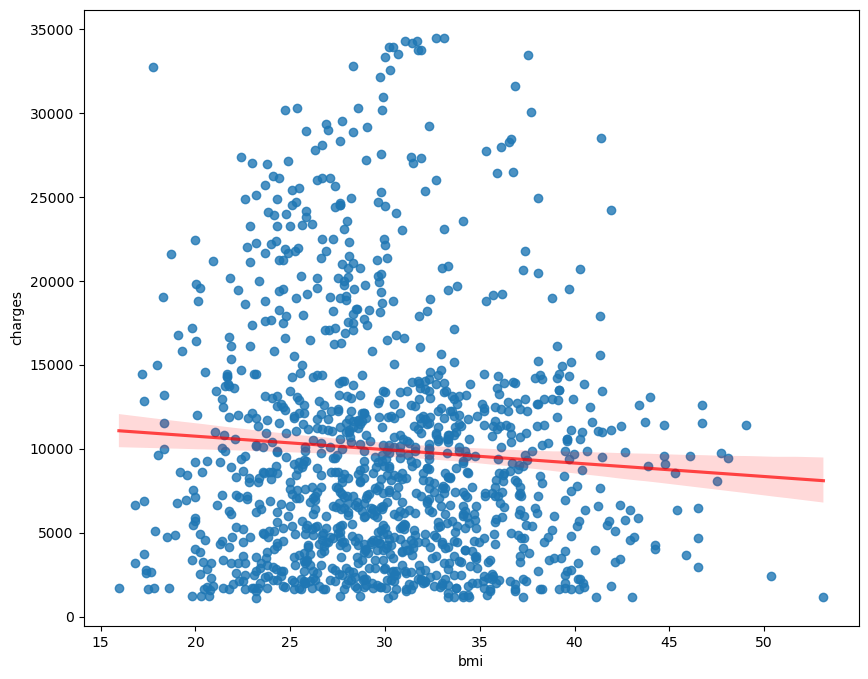

In [53]:
sns.regplot(data = df,x = 'bmi', y = 'charges',line_kws = {"color": "red", "alpha": 0.7 });

- Para la variable *children*:

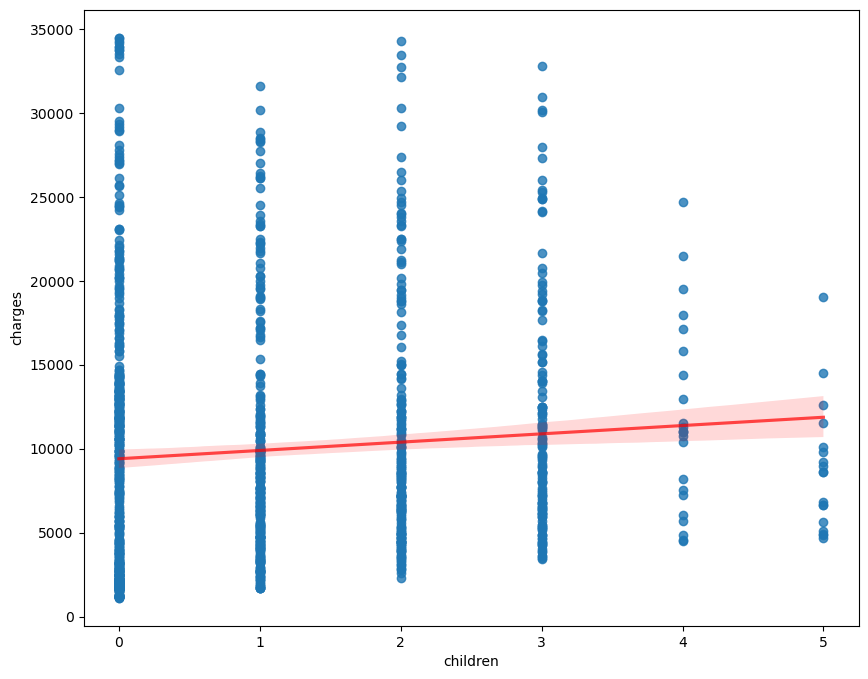

In [54]:
sns.regplot(data = df,x = 'children', y = 'charges',line_kws = {"color": "red", "alpha": 0.7 });

Como la distribución de los puntos no es constante en todo el intervalo,no parece que cumplan la asunción de homogeneidad. 

Comprobamos analiticamente (mediante Levene) la homogeneidad de la varianza de las variables de 'age', 'bmi' y 'children'.

In [55]:
list(numericas)

['age', 'bmi', 'children', 'charges']

In [56]:
statistic, p_val = levene(df['age'], df.charges, center='median')
p_val

9.180962524904417e-246

In [57]:
statistic, p_val = levene(df['bmi'], df.charges, center='median')
p_val

2.6816472580508013e-246

In [58]:
statistic, p_val = levene(df['children'], df.charges, center='median')
p_val

1.4264163572825863e-246

Para todas las numéricas, obtenemos un p-value < 0.05, por lo tanto no se cumple la asunción de homocedasticidad.